In [1]:
%matplotlib inline
import random
from scipy import ndarray
import skimage as sk
from skimage import transform
from skimage import util
import cv2
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import pickle
from tqdm import tqdm

In [9]:
source_dir = 'X:\Flipkart GRID - Object Localization (Medium Complexity Round)\\orig_data\\data\\images'
dest_dir = 'X:\Flipkart GRID - Object Localization (Medium Complexity Round)\\high_complexity\\images'
csv_dest_dir = 'X:\Flipkart GRID - Object Localization (Medium Complexity Round)\\high_complexity'
img_width, img_height = 640., 480.
data_df = pd.read_csv(os.path.join('X:\Flipkart GRID - Object Localization (Medium Complexity Round)\\orig_data', 'training_set_s3.csv'))

In [3]:
def vertical_flip(image_array: ndarray):
    return cv2.flip( img, 0)

def noisy(noise_typ,image):
    if noise_typ == "gauss":
        row,col,ch= image.shape
        mean = 0
        var = 1
        sigma = var**0.5
        gauss = np.random.normal(mean,sigma,(row,col,ch))
        gauss = gauss.reshape(row,col,ch)
        noisy = image + gauss
        return noisy
    elif noise_typ == "s&p":
        row,col,ch = image.shape
        s_vs_p = 0.5
        amount = 0.004
        out = np.copy(image)
        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
        out[coords] = 1

        # Pepper mode
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
        out[coords] = 0
        return out
    elif noise_typ == "poisson":
        vals = len(np.unique(image))
        vals = 2 ** np.ceil(np.log2(vals))
        noisy = np.random.poisson(image * vals) / float(vals)
        return noisy
    elif noise_typ =="speckle":
        row,col,ch = image.shape
        gauss = np.random.randn(row,col,ch)
        gauss = gauss.reshape(row,col,ch)        
        noisy = image + image * gauss
        return noisy

def random_noise(image_array: ndarray):
    # add random noise to the image
    return sk.util.random_noise(image_array)

def horizontal_flip(image_array: ndarray):
    # horizontal flip doesn't need skimage, it's easy as flipping the image array of pixels !
    return cv2.flip(img, 1)

def hv_flip(image_array: ndarray):
    # horizontal flip doesn't need skimage, it's easy as flipping the image array of pixels !
    return cv2.flip(img, -1)

In [4]:
# im = os.path.join(orig_img_dir, data_df.image_name[3])
# img = cv2.imread(im)
# img_h_flip = horizontal_flip(img).astype(np.uint8) # noisy('gauss',img).astype(np.uint8)
# img_v_flip = vertical_flip(img).astype(np.uint8)
# img_hv_flip = hv_flip(img).astype(np.uint8)
# plt.figure(0)
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# plt.figure(1)
# plt.imshow(cv2.cvtColor(img_h_flip, cv2.COLOR_BGR2RGB))
# plt.figure(2)
# plt.imshow(cv2.cvtColor(img_v_flip, cv2.COLOR_BGR2RGB))
# plt.figure(3)
# plt.imshow(cv2.cvtColor(img_hv_flip, cv2.COLOR_BGR2RGB))

In [5]:
# df1 = pd.DataFrame({'image_name': ['aug_im'], 'x1': [1], 'x2': [2], 'y1': [3], 'y2' :[4]})
# df2 = pd.DataFrame({'image_name': ['aug_im'], 'x1': [1], 'x2': [2], 'y1': [3], 'y2' :[4]})
# df1 = df1.append(df2, ignore_index=True)
# df1.head()

In [19]:
data_df = data_df.sample(frac=1).reset_index(drop=True)
val_df = data_df[22000:]
res_df = data_df[:22000]
val_df.to_csv(os.path.join(csv_dest_dir, 'val.csv'), index=False)

In [20]:
temp = data_df[:22000]

In [21]:
# Horizontal Flip Loop
for i, im in tqdm(enumerate(temp.image_name)):
    img = cv2.imread(os.path.join(source_dir, im))
    x1 = data_df.iloc[i].x1
    x2 = data_df.iloc[i].x2
    y1 = data_df.iloc[i].y1
    y2 = data_df.iloc[i].y2
    aug_im = '[h]' + im
    img_h = horizontal_flip(img).astype(np.uint8)
    img_h_lab = pd.DataFrame({'image_name': [aug_im], 'x1': [img_width - x2], 'x2': [img_width - x1], 'y1': [y1], 'y2' :[y2]})
    cv2.imwrite(os.path.join(dest_dir, aug_im), img_h)
    res_df = res_df.append(img_h_lab, ignore_index = True)
    


0it [00:00, ?it/s]
5it [00:00, 48.56it/s]
11it [00:00, 50.00it/s]
17it [00:00, 50.41it/s]
23it [00:00, 51.67it/s]
29it [00:00, 52.84it/s]
34it [00:00, 51.83it/s]
40it [00:00, 53.06it/s]
46it [00:00, 52.29it/s]
52it [00:00, 53.12it/s]
58it [00:01, 52.06it/s]
64it [00:01, 49.07it/s]
70it [00:01, 49.88it/s]
76it [00:01, 50.33it/s]
82it [00:01, 52.24it/s]
88it [00:01, 49.92it/s]
94it [00:01, 49.61it/s]
99it [00:01, 49.32it/s]
105it [00:02, 49.81it/s]
111it [00:02, 50.79it/s]
117it [00:02, 51.11it/s]
123it [00:02, 52.78it/s]
129it [00:02, 52.46it/s]
135it [00:02, 52.46it/s]
141it [00:02, 53.82it/s]
147it [00:02, 53.79it/s]
154it [00:02, 54.80it/s]
160it [00:03, 53.69it/s]
166it [00:03, 52.30it/s]
172it [00:03, 53.05it/s]
178it [00:03, 53.73it/s]
184it [00:03, 53.87it/s]
190it [00:03, 53.27it/s]
196it [00:03, 52.70it/s]
202it [00:03, 54.23it/s]
208it [00:03, 53.26it/s]
214it [00:04, 53.39it/s]
220it [00:04, 51.96it/s]
226it [00:04, 53.31it/s]
232it [00:04, 52.18it/s]
238it [00:04, 51.41it/s

1935it [00:37, 49.58it/s]
1941it [00:37, 50.02it/s]
1947it [00:37, 50.30it/s]
1953it [00:37, 50.51it/s]
1959it [00:37, 49.77it/s]
1965it [00:37, 52.08it/s]
1971it [00:37, 51.45it/s]
1977it [00:38, 50.56it/s]
1983it [00:38, 50.56it/s]
1989it [00:38, 51.20it/s]
1995it [00:38, 52.14it/s]
2001it [00:38, 51.12it/s]
2007it [00:38, 52.96it/s]
2013it [00:38, 54.11it/s]
2019it [00:38, 52.93it/s]
2025it [00:38, 51.79it/s]
2031it [00:39, 50.58it/s]
2037it [00:39, 50.84it/s]
2043it [00:39, 51.67it/s]
2049it [00:39, 53.10it/s]
2055it [00:39, 50.09it/s]
2061it [00:39, 49.85it/s]
2067it [00:39, 51.27it/s]
2073it [00:39, 50.67it/s]
2079it [00:40, 50.38it/s]
2085it [00:40, 50.55it/s]
2091it [00:40, 51.46it/s]
2097it [00:40, 52.25it/s]
2103it [00:40, 52.91it/s]
2109it [00:40, 54.22it/s]
2115it [00:40, 54.27it/s]
2121it [00:40, 52.65it/s]
2127it [00:40, 54.58it/s]
2133it [00:41, 54.46it/s]
2139it [00:41, 53.37it/s]
2145it [00:41, 51.81it/s]
2151it [00:41, 51.55it/s]
2157it [00:41, 52.79it/s]
2163it [00:4

3836it [01:13, 54.85it/s]
3842it [01:13, 55.10it/s]
3848it [01:13, 54.38it/s]
3854it [01:13, 54.04it/s]
3860it [01:13, 52.94it/s]
3866it [01:14, 39.65it/s]
3872it [01:14, 43.79it/s]
3877it [01:14, 44.90it/s]
3884it [01:14, 48.48it/s]
3890it [01:14, 47.60it/s]
3896it [01:14, 49.29it/s]
3902it [01:14, 49.77it/s]
3908it [01:14, 49.78it/s]
3914it [01:14, 49.76it/s]
3920it [01:15, 51.28it/s]
3926it [01:15, 52.40it/s]
3932it [01:15, 51.96it/s]
3938it [01:15, 51.60it/s]
3944it [01:15, 53.71it/s]
3950it [01:15, 53.00it/s]
3956it [01:15, 53.96it/s]
3962it [01:15, 54.33it/s]
3969it [01:15, 56.05it/s]
3975it [01:16, 54.90it/s]
3981it [01:16, 54.10it/s]
3987it [01:16, 52.98it/s]
3993it [01:16, 53.36it/s]
3999it [01:16, 55.07it/s]
4005it [01:16, 54.37it/s]
4011it [01:16, 52.75it/s]
4017it [01:16, 52.34it/s]
4023it [01:17, 52.75it/s]
4029it [01:17, 52.15it/s]
4035it [01:17, 54.19it/s]
4041it [01:17, 53.61it/s]
4047it [01:17, 53.64it/s]
4053it [01:17, 52.76it/s]
4059it [01:17, 53.61it/s]
4065it [01:1

5731it [01:49, 52.75it/s]
5737it [01:49, 50.36it/s]
5743it [01:49, 50.93it/s]
5749it [01:49, 50.24it/s]
5755it [01:49, 51.37it/s]
5761it [01:50, 51.65it/s]
5767it [01:50, 51.44it/s]
5773it [01:50, 50.42it/s]
5779it [01:50, 52.94it/s]
5785it [01:50, 51.26it/s]
5791it [01:50, 51.25it/s]
5797it [01:50, 50.36it/s]
5803it [01:50, 50.68it/s]
5809it [01:50, 51.42it/s]
5815it [01:51, 50.77it/s]
5821it [01:51, 37.78it/s]
5827it [01:51, 41.17it/s]
5833it [01:51, 45.20it/s]
5838it [01:51, 46.19it/s]
5844it [01:51, 48.35it/s]
5850it [01:51, 50.81it/s]
5856it [01:51, 50.86it/s]
5862it [01:52, 51.15it/s]
5868it [01:52, 52.71it/s]
5874it [01:52, 52.87it/s]
5880it [01:52, 54.57it/s]
5886it [01:52, 52.32it/s]
5892it [01:52, 53.29it/s]
5898it [01:52, 51.15it/s]
5904it [01:52, 52.89it/s]
5910it [01:52, 53.13it/s]
5916it [01:53, 53.13it/s]
5922it [01:53, 51.91it/s]
5928it [01:53, 53.52it/s]
5934it [01:53, 52.82it/s]
5940it [01:53, 51.96it/s]
5946it [01:53, 51.62it/s]
5952it [01:53, 50.91it/s]
5958it [01:5

7623it [02:25, 50.66it/s]
7629it [02:25, 50.65it/s]
7635it [02:26, 51.76it/s]
7642it [02:26, 52.86it/s]
7648it [02:26, 53.75it/s]
7654it [02:26, 52.75it/s]
7660it [02:26, 53.00it/s]
7666it [02:26, 52.50it/s]
7672it [02:26, 53.17it/s]
7678it [02:26, 53.75it/s]
7684it [02:26, 52.89it/s]
7690it [02:27, 51.90it/s]
7696it [02:27, 51.49it/s]
7702it [02:27, 50.62it/s]
7708it [02:27, 51.38it/s]
7714it [02:27, 50.23it/s]
7720it [02:27, 50.71it/s]
7726it [02:27, 52.94it/s]
7732it [02:27, 54.26it/s]
7738it [02:28, 53.23it/s]
7744it [02:28, 51.85it/s]
7750it [02:28, 52.96it/s]
7756it [02:28, 51.61it/s]
7762it [02:28, 50.69it/s]
7768it [02:28, 51.04it/s]
7774it [02:28, 51.87it/s]
7780it [02:28, 52.14it/s]
7786it [02:28, 51.36it/s]
7792it [02:29, 52.05it/s]
7798it [02:29, 52.43it/s]
7804it [02:29, 51.36it/s]
7810it [02:29, 52.59it/s]
7816it [02:29, 52.35it/s]
7822it [02:29, 52.29it/s]
7828it [02:29, 50.85it/s]
7834it [02:29, 51.51it/s]
7840it [02:30, 50.11it/s]
7846it [02:30, 51.27it/s]
7853it [02:3

9521it [03:02, 51.45it/s]
9527it [03:02, 51.80it/s]
9533it [03:02, 50.10it/s]
9539it [03:02, 51.47it/s]
9545it [03:02, 50.93it/s]
9551it [03:02, 52.20it/s]
9557it [03:02, 53.42it/s]
9563it [03:02, 51.76it/s]
9569it [03:03, 49.84it/s]
9575it [03:03, 49.99it/s]
9581it [03:03, 50.82it/s]
9587it [03:03, 52.44it/s]
9593it [03:03, 54.24it/s]
9599it [03:03, 51.96it/s]
9605it [03:03, 51.83it/s]
9612it [03:03, 53.31it/s]
9618it [03:03, 54.01it/s]
9624it [03:04, 52.39it/s]
9630it [03:04, 53.07it/s]
9636it [03:04, 52.56it/s]
9642it [03:04, 52.51it/s]
9648it [03:04, 52.59it/s]
9654it [03:04, 53.74it/s]
9660it [03:04, 52.47it/s]
9666it [03:04, 53.44it/s]
9672it [03:04, 51.73it/s]
9678it [03:05, 51.96it/s]
9684it [03:05, 52.20it/s]
9690it [03:05, 52.51it/s]
9696it [03:05, 53.29it/s]
9702it [03:05, 52.63it/s]
9708it [03:05, 52.22it/s]
9714it [03:05, 53.21it/s]
9720it [03:05, 54.82it/s]
9726it [03:05, 52.08it/s]
9732it [03:06, 51.71it/s]
9738it [03:06, 53.17it/s]
9744it [03:06, 53.29it/s]
9750it [03:0

11355it [03:37, 45.64it/s]
11360it [03:37, 46.77it/s]
11365it [03:37, 46.15it/s]
11370it [03:37, 44.99it/s]
11375it [03:37, 44.80it/s]
11381it [03:37, 46.49it/s]
11387it [03:38, 47.30it/s]
11393it [03:38, 49.30it/s]
11398it [03:38, 48.63it/s]
11404it [03:38, 50.81it/s]
11410it [03:38, 50.87it/s]
11416it [03:38, 50.64it/s]
11422it [03:38, 50.49it/s]
11428it [03:38, 51.47it/s]
11434it [03:38, 52.17it/s]
11440it [03:39, 51.59it/s]
11446it [03:39, 52.49it/s]
11452it [03:39, 49.83it/s]
11458it [03:39, 49.67it/s]
11464it [03:39, 50.95it/s]
11470it [03:39, 50.08it/s]
11476it [03:39, 51.91it/s]
11482it [03:39, 51.23it/s]
11488it [03:40, 44.42it/s]
11493it [03:40, 45.37it/s]
11499it [03:40, 47.36it/s]
11504it [03:40, 42.53it/s]
11509it [03:40, 44.44it/s]
11515it [03:40, 46.22it/s]
11520it [03:40, 45.40it/s]
11526it [03:40, 48.30it/s]
11532it [03:41, 49.31it/s]
11538it [03:41, 47.56it/s]
11543it [03:41, 47.08it/s]
11548it [03:41, 46.36it/s]
11554it [03:41, 48.00it/s]
11560it [03:41, 49.22it/s]
1

13143it [04:12, 54.68it/s]
13149it [04:12, 53.66it/s]
13155it [04:12, 52.01it/s]
13161it [04:12, 52.79it/s]
13167it [04:12, 53.21it/s]
13173it [04:12, 53.69it/s]
13179it [04:13, 53.69it/s]
13185it [04:13, 51.42it/s]
13191it [04:13, 51.78it/s]
13197it [04:13, 51.49it/s]
13203it [04:13, 51.85it/s]
13209it [04:13, 52.99it/s]
13215it [04:13, 52.93it/s]
13221it [04:13, 52.89it/s]
13227it [04:13, 53.27it/s]
13233it [04:14, 52.62it/s]
13239it [04:14, 53.22it/s]
13245it [04:14, 53.75it/s]
13251it [04:14, 52.61it/s]
13257it [04:14, 51.42it/s]
13263it [04:14, 51.73it/s]
13269it [04:14, 51.95it/s]
13275it [04:14, 52.46it/s]
13281it [04:14, 54.11it/s]
13287it [04:15, 54.62it/s]
13293it [04:15, 54.20it/s]
13299it [04:15, 52.75it/s]
13305it [04:15, 52.45it/s]
13311it [04:15, 50.98it/s]
13317it [04:15, 51.77it/s]
13323it [04:15, 50.75it/s]
13329it [04:15, 51.48it/s]
13335it [04:16, 51.25it/s]
13341it [04:16, 51.53it/s]
13347it [04:16, 51.21it/s]
13353it [04:16, 50.94it/s]
13359it [04:16, 50.19it/s]
1

14963it [04:47, 51.73it/s]
14969it [04:47, 50.84it/s]
14975it [04:48, 40.90it/s]
14981it [04:48, 43.68it/s]
14987it [04:48, 46.38it/s]
14993it [04:48, 47.79it/s]
14998it [04:48, 46.58it/s]
15003it [04:48, 46.98it/s]
15009it [04:48, 47.96it/s]
15015it [04:48, 49.14it/s]
15021it [04:49, 50.72it/s]
15027it [04:49, 40.08it/s]
15032it [04:49, 35.57it/s]
15037it [04:49, 38.34it/s]
15042it [04:49, 40.76it/s]
15048it [04:49, 43.25it/s]
15053it [04:49, 44.27it/s]
15058it [04:50, 45.13it/s]
15064it [04:50, 47.40it/s]
15070it [04:50, 50.16it/s]
15076it [04:50, 50.34it/s]
15082it [04:50, 50.52it/s]
15088it [04:50, 50.85it/s]
15094it [04:50, 52.19it/s]
15100it [04:50, 49.04it/s]
15106it [04:50, 51.29it/s]
15112it [04:51, 50.82it/s]
15118it [04:51, 51.00it/s]
15124it [04:51, 52.45it/s]
15130it [04:51, 51.93it/s]
15137it [04:51, 54.11it/s]
15143it [04:51, 53.66it/s]
15149it [04:51, 53.82it/s]
15155it [04:51, 53.45it/s]
15161it [04:51, 52.73it/s]
15167it [04:52, 52.83it/s]
15173it [04:52, 48.81it/s]
1

16746it [05:23, 50.77it/s]
16752it [05:23, 50.83it/s]
16758it [05:23, 52.06it/s]
16764it [05:23, 53.81it/s]
16770it [05:23, 53.78it/s]
16776it [05:23, 52.77it/s]
16782it [05:23, 52.77it/s]
16788it [05:24, 54.17it/s]
16794it [05:24, 55.36it/s]
16800it [05:24, 52.68it/s]
16806it [05:24, 51.49it/s]
16812it [05:24, 53.05it/s]
16818it [05:24, 54.25it/s]
16824it [05:24, 51.87it/s]
16830it [05:24, 44.71it/s]
16836it [05:25, 46.62it/s]
16842it [05:25, 49.28it/s]
16848it [05:25, 49.56it/s]
16854it [05:25, 50.47it/s]
16860it [05:25, 50.63it/s]
16866it [05:25, 50.69it/s]
16872it [05:25, 51.18it/s]
16878it [05:25, 51.12it/s]
16885it [05:25, 53.37it/s]
16891it [05:26, 52.93it/s]
16897it [05:26, 52.87it/s]
16903it [05:26, 49.25it/s]
16909it [05:26, 50.64it/s]
16915it [05:26, 51.62it/s]
16921it [05:26, 51.96it/s]
16927it [05:26, 51.95it/s]
16933it [05:26, 53.73it/s]
16939it [05:27, 53.48it/s]
16945it [05:27, 51.80it/s]
16951it [05:27, 51.82it/s]
16957it [05:27, 52.10it/s]
16963it [05:27, 53.99it/s]
1

18492it [05:58, 49.17it/s]
18497it [05:59, 40.85it/s]
18502it [05:59, 42.12it/s]
18507it [05:59, 44.00it/s]
18512it [05:59, 45.43it/s]
18518it [05:59, 46.74it/s]
18524it [05:59, 47.50it/s]
18529it [05:59, 47.35it/s]
18534it [05:59, 47.24it/s]
18539it [05:59, 46.80it/s]
18544it [06:00, 46.81it/s]
18550it [06:00, 48.15it/s]
18555it [06:00, 48.59it/s]
18560it [06:00, 42.13it/s]
18565it [06:00, 44.06it/s]
18570it [06:00, 44.62it/s]
18575it [06:00, 46.03it/s]
18581it [06:00, 48.10it/s]
18587it [06:00, 48.83it/s]
18593it [06:01, 49.36it/s]
18598it [06:01, 44.81it/s]
18603it [06:01, 46.04it/s]
18609it [06:01, 48.39it/s]
18614it [06:01, 47.41it/s]
18619it [06:01, 41.42it/s]
18624it [06:01, 42.84it/s]
18630it [06:01, 45.61it/s]
18635it [06:02, 46.07it/s]
18641it [06:02, 47.92it/s]
18647it [06:02, 49.69it/s]
18653it [06:02, 51.37it/s]
18659it [06:02, 50.35it/s]
18665it [06:02, 50.84it/s]
18671it [06:02, 50.37it/s]
18677it [06:02, 50.59it/s]
18683it [06:02, 50.41it/s]
18689it [06:03, 43.56it/s]
1

20128it [06:34, 46.61it/s]
20133it [06:34, 41.21it/s]
20139it [06:34, 45.15it/s]
20145it [06:34, 47.28it/s]
20150it [06:34, 47.79it/s]
20155it [06:34, 47.05it/s]
20160it [06:34, 47.16it/s]
20165it [06:35, 46.77it/s]
20171it [06:35, 48.68it/s]
20177it [06:35, 49.98it/s]
20183it [06:35, 49.16it/s]
20189it [06:35, 49.05it/s]
20195it [06:35, 51.26it/s]
20201it [06:35, 43.38it/s]
20206it [06:35, 44.82it/s]
20211it [06:36, 44.95it/s]
20217it [06:36, 46.43it/s]
20222it [06:36, 45.62it/s]
20228it [06:36, 46.58it/s]
20233it [06:36, 46.82it/s]
20238it [06:36, 46.97it/s]
20243it [06:36, 46.16it/s]
20248it [06:36, 46.92it/s]
20253it [06:36, 47.08it/s]
20258it [06:37, 46.49it/s]
20263it [06:37, 42.56it/s]
20268it [06:37, 44.02it/s]
20273it [06:37, 44.95it/s]
20279it [06:37, 47.32it/s]
20284it [06:37, 46.58it/s]
20289it [06:37, 47.48it/s]
20294it [06:37, 47.74it/s]
20300it [06:37, 49.17it/s]
20305it [06:38, 47.96it/s]
20311it [06:38, 49.25it/s]
20316it [06:38, 49.13it/s]
20321it [06:38, 48.96it/s]
2

21739it [07:09, 48.50it/s]
21744it [07:09, 48.27it/s]
21749it [07:09, 47.57it/s]
21754it [07:09, 46.69it/s]
21759it [07:09, 47.54it/s]
21764it [07:09, 47.74it/s]
21769it [07:09, 40.17it/s]
21775it [07:10, 43.83it/s]
21780it [07:10, 43.99it/s]
21785it [07:10, 36.58it/s]
21790it [07:10, 38.61it/s]
21795it [07:10, 40.76it/s]
21800it [07:10, 43.07it/s]
21806it [07:10, 45.38it/s]
21811it [07:10, 45.93it/s]
21816it [07:10, 46.34it/s]
21821it [07:11, 46.49it/s]
21826it [07:11, 39.82it/s]
21831it [07:11, 42.33it/s]
21837it [07:11, 44.02it/s]
21842it [07:11, 44.24it/s]
21847it [07:11, 45.12it/s]
21852it [07:11, 46.25it/s]
21857it [07:11, 46.69it/s]
21863it [07:12, 47.67it/s]
21868it [07:12, 47.56it/s]
21873it [07:12, 47.48it/s]
21879it [07:12, 48.02it/s]
21885it [07:12, 48.75it/s]
21890it [07:12, 42.74it/s]
21895it [07:12, 43.78it/s]
21901it [07:12, 45.21it/s]
21906it [07:12, 45.81it/s]
21911it [07:13, 46.38it/s]
21916it [07:13, 46.65it/s]
21921it [07:13, 46.19it/s]
21926it [07:13, 45.88it/s]
2

In [22]:
# res_df.head()
res_df.tail()

image_name     x1     x2   y1   y2
43995  [h]JPEG_20161124_171740_1000305751133.png  248.0  385.0  148  403
43996              [h]1473944716213ANG990060.png   82.0  560.0  144  372
43997               [h]1472822559890DSC_3143.png   32.0  600.0   48  464
43998               [h]1473140459650DSC_3983.png   51.0  574.0   53  433
43999  [h]JPEG_20161127_165248_1000255321066.png   88.0  552.0   21  478

In [23]:
# Vertical Flip Loop
for i, im in tqdm(enumerate(temp.image_name)):
    img = cv2.imread(os.path.join(source_dir, im))
    x1 = data_df.iloc[i].x1
    x2 = data_df.iloc[i].x2
    y1 = data_df.iloc[i].y1
    y2 = data_df.iloc[i].y2
    aug_im = '[v]' + im
    img_v = vertical_flip(img).astype(np.uint8)
    img_v_lab = pd.DataFrame({'image_name': [aug_im], 'x1': [x1], 'x2': [x2], 'y1':[img_height - y2], 'y2': [img_height - y1] })
    cv2.imwrite(os.path.join(dest_dir, aug_im), img_v)
    res_df = res_df.append(img_v_lab, ignore_index = True)


0it [00:00, ?it/s]
5it [00:00, 43.61it/s]
7it [00:00, 31.34it/s]
12it [00:00, 34.08it/s]
17it [00:00, 35.92it/s]
22it [00:00, 38.27it/s]
27it [00:00, 39.92it/s]
31it [00:00, 34.24it/s]
36it [00:00, 36.20it/s]
41it [00:01, 38.67it/s]
46it [00:01, 39.65it/s]
51it [00:01, 41.56it/s]
56it [00:01, 41.84it/s]
61it [00:01, 37.42it/s]
66it [00:01, 38.27it/s]
71it [00:01, 40.30it/s]
76it [00:01, 41.24it/s]
81it [00:02, 42.56it/s]
86it [00:02, 43.42it/s]
91it [00:02, 44.04it/s]
96it [00:02, 42.90it/s]
101it [00:02, 43.32it/s]
106it [00:02, 43.18it/s]
111it [00:02, 43.87it/s]
116it [00:02, 44.49it/s]
121it [00:02, 39.70it/s]
126it [00:03, 41.40it/s]
131it [00:03, 41.82it/s]
136it [00:03, 42.23it/s]
142it [00:03, 44.14it/s]
147it [00:03, 44.44it/s]
152it [00:03, 45.63it/s]
157it [00:03, 45.37it/s]
162it [00:03, 45.31it/s]
167it [00:03, 44.19it/s]
172it [00:04, 44.83it/s]
177it [00:04, 44.69it/s]
182it [00:04, 41.08it/s]
187it [00:04, 42.02it/s]
192it [00:04, 41.43it/s]
197it [00:04, 42.70it/s]
20

1614it [00:38, 42.37it/s]
1619it [00:38, 42.72it/s]
1624it [00:38, 42.98it/s]
1629it [00:38, 42.94it/s]
1634it [00:39, 42.91it/s]
1639it [00:39, 43.34it/s]
1644it [00:39, 36.66it/s]
1649it [00:39, 38.40it/s]
1654it [00:39, 39.54it/s]
1659it [00:39, 36.34it/s]
1664it [00:39, 38.08it/s]
1668it [00:40, 38.33it/s]
1673it [00:40, 40.06it/s]
1678it [00:40, 40.76it/s]
1683it [00:40, 41.88it/s]
1688it [00:40, 43.26it/s]
1693it [00:40, 42.80it/s]
1698it [00:40, 43.94it/s]
1703it [00:40, 44.07it/s]
1708it [00:40, 43.93it/s]
1713it [00:41, 43.37it/s]
1718it [00:41, 39.53it/s]
1723it [00:41, 40.28it/s]
1728it [00:41, 40.42it/s]
1733it [00:41, 41.22it/s]
1738it [00:41, 42.65it/s]
1743it [00:41, 41.96it/s]
1748it [00:41, 42.76it/s]
1753it [00:41, 44.15it/s]
1758it [00:42, 43.41it/s]
1763it [00:42, 43.69it/s]
1768it [00:42, 44.01it/s]
1773it [00:42, 40.78it/s]
1778it [00:42, 40.57it/s]
1783it [00:42, 41.03it/s]
1788it [00:42, 41.25it/s]
1793it [00:42, 41.61it/s]
1798it [00:43, 42.19it/s]
1803it [00:4

3192it [01:16, 42.04it/s]
3197it [01:16, 38.48it/s]
3202it [01:16, 39.51it/s]
3207it [01:16, 40.85it/s]
3212it [01:16, 41.03it/s]
3217it [01:17, 41.04it/s]
3222it [01:17, 42.30it/s]
3227it [01:17, 43.46it/s]
3232it [01:17, 42.51it/s]
3237it [01:17, 42.07it/s]
3242it [01:17, 42.74it/s]
3247it [01:17, 43.66it/s]
3252it [01:17, 39.05it/s]
3257it [01:18, 40.31it/s]
3262it [01:18, 40.94it/s]
3267it [01:18, 43.10it/s]
3272it [01:18, 42.58it/s]
3277it [01:18, 43.55it/s]
3282it [01:18, 43.01it/s]
3287it [01:18, 43.75it/s]
3292it [01:18, 43.13it/s]
3297it [01:18, 43.39it/s]
3303it [01:19, 44.91it/s]
3308it [01:19, 44.74it/s]
3313it [01:19, 40.81it/s]
3318it [01:19, 41.72it/s]
3323it [01:19, 42.69it/s]
3328it [01:19, 42.20it/s]
3333it [01:19, 41.55it/s]
3338it [01:19, 42.90it/s]
3343it [01:20, 44.13it/s]
3348it [01:20, 44.08it/s]
3353it [01:20, 44.64it/s]
3358it [01:20, 44.08it/s]
3363it [01:20, 43.60it/s]
3368it [01:20, 37.69it/s]
3373it [01:20, 39.47it/s]
3378it [01:20, 40.73it/s]
3383it [01:2

4769it [01:54, 40.72it/s]
4774it [01:54, 42.03it/s]
4779it [01:54, 42.76it/s]
4784it [01:54, 43.12it/s]
4789it [01:54, 37.03it/s]
4794it [01:54, 39.49it/s]
4799it [01:55, 40.82it/s]
4804it [01:55, 42.28it/s]
4809it [01:55, 44.21it/s]
4814it [01:55, 43.05it/s]
4819it [01:55, 44.59it/s]
4824it [01:55, 44.66it/s]
4829it [01:55, 44.63it/s]
4834it [01:55, 46.02it/s]
4839it [01:55, 45.77it/s]
4844it [01:56, 46.19it/s]
4849it [01:56, 40.72it/s]
4854it [01:56, 41.69it/s]
4859it [01:56, 43.31it/s]
4864it [01:56, 43.52it/s]
4869it [01:56, 42.84it/s]
4874it [01:56, 43.38it/s]
4879it [01:56, 42.10it/s]
4884it [01:56, 42.89it/s]
4889it [01:57, 44.23it/s]
4894it [01:57, 44.50it/s]
4900it [01:57, 45.93it/s]
4905it [01:57, 39.28it/s]
4910it [01:57, 40.50it/s]
4915it [01:57, 41.48it/s]
4920it [01:57, 41.97it/s]
4925it [01:57, 41.62it/s]
4930it [01:58, 42.95it/s]
4935it [01:58, 43.83it/s]
4940it [01:58, 43.93it/s]
4945it [01:58, 44.08it/s]
4950it [01:58, 43.29it/s]
4955it [01:58, 42.92it/s]
4960it [01:5

6347it [02:31, 40.04it/s]
6352it [02:32, 40.45it/s]
6357it [02:32, 41.11it/s]
6362it [02:32, 42.18it/s]
6368it [02:32, 43.94it/s]
6373it [02:32, 43.85it/s]
6378it [02:32, 44.23it/s]
6383it [02:32, 44.47it/s]
6388it [02:32, 38.29it/s]
6393it [02:33, 39.91it/s]
6398it [02:33, 41.63it/s]
6403it [02:33, 41.91it/s]
6408it [02:33, 42.59it/s]
6413it [02:33, 43.50it/s]
6418it [02:33, 44.24it/s]
6423it [02:33, 44.16it/s]
6428it [02:33, 42.97it/s]
6433it [02:33, 43.17it/s]
6438it [02:34, 43.44it/s]
6443it [02:34, 43.34it/s]
6448it [02:34, 38.71it/s]
6453it [02:34, 39.48it/s]
6458it [02:34, 40.03it/s]
6463it [02:34, 40.63it/s]
6468it [02:34, 41.06it/s]
6473it [02:34, 42.03it/s]
6478it [02:35, 42.48it/s]
6483it [02:35, 41.99it/s]
6488it [02:35, 41.94it/s]
6493it [02:35, 41.97it/s]
6498it [02:35, 42.94it/s]
6503it [02:35, 39.00it/s]
6508it [02:35, 39.99it/s]
6513it [02:35, 40.89it/s]
6518it [02:36, 41.58it/s]
6523it [02:36, 42.22it/s]
6528it [02:36, 42.69it/s]
6533it [02:36, 42.80it/s]
6538it [02:3

7914it [03:09, 38.79it/s]
7919it [03:09, 39.56it/s]
7924it [03:10, 40.28it/s]
7929it [03:10, 40.87it/s]
7934it [03:10, 41.11it/s]
7939it [03:10, 41.09it/s]
7944it [03:10, 41.72it/s]
7949it [03:10, 42.53it/s]
7954it [03:10, 43.33it/s]
7959it [03:10, 43.22it/s]
7964it [03:10, 43.77it/s]
7969it [03:11, 39.42it/s]
7974it [03:11, 41.18it/s]
7979it [03:11, 43.32it/s]
7984it [03:11, 42.76it/s]
7989it [03:11, 42.80it/s]
7994it [03:11, 43.19it/s]
7999it [03:11, 42.71it/s]
8004it [03:11, 43.54it/s]
8009it [03:12, 43.99it/s]
8014it [03:12, 43.40it/s]
8019it [03:12, 42.78it/s]
8024it [03:12, 37.37it/s]
8029it [03:12, 39.51it/s]
8034it [03:12, 40.10it/s]
8039it [03:12, 41.65it/s]
8044it [03:12, 41.65it/s]
8049it [03:13, 42.57it/s]
8054it [03:13, 43.51it/s]
8059it [03:13, 43.51it/s]
8064it [03:13, 43.77it/s]
8069it [03:13, 44.90it/s]
8074it [03:13, 45.12it/s]
8079it [03:13, 44.46it/s]
8084it [03:13, 38.80it/s]
8089it [03:13, 40.05it/s]
8094it [03:14, 41.59it/s]
8099it [03:14, 41.91it/s]
8104it [03:1

9490it [03:47, 39.07it/s]
9495it [03:47, 40.26it/s]
9500it [03:47, 41.27it/s]
9505it [03:47, 37.48it/s]
9510it [03:47, 39.49it/s]
9515it [03:48, 41.53it/s]
9520it [03:48, 41.16it/s]
9525it [03:48, 41.14it/s]
9530it [03:48, 40.78it/s]
9535it [03:48, 41.10it/s]
9540it [03:48, 42.00it/s]
9545it [03:48, 41.31it/s]
9550it [03:48, 42.55it/s]
9555it [03:49, 43.38it/s]
9560it [03:49, 42.97it/s]
9565it [03:49, 39.13it/s]
9570it [03:49, 40.19it/s]
9575it [03:49, 40.94it/s]
9580it [03:49, 41.76it/s]
9585it [03:49, 42.69it/s]
9590it [03:49, 43.90it/s]
9595it [03:49, 44.80it/s]
9600it [03:50, 43.31it/s]
9605it [03:50, 43.37it/s]
9610it [03:50, 44.49it/s]
9615it [03:50, 43.66it/s]
9620it [03:50, 39.30it/s]
9625it [03:50, 39.90it/s]
9630it [03:50, 41.10it/s]
9635it [03:50, 41.81it/s]
9640it [03:51, 41.91it/s]
9645it [03:51, 42.13it/s]
9650it [03:51, 42.77it/s]
9655it [03:51, 42.86it/s]
9660it [03:51, 42.75it/s]
9665it [03:51, 43.04it/s]
9670it [03:51, 43.88it/s]
9675it [03:51, 37.40it/s]
9680it [03:5

11019it [04:24, 45.02it/s]
11024it [04:24, 41.52it/s]
11029it [04:24, 41.77it/s]
11034it [04:24, 40.48it/s]
11039it [04:25, 41.31it/s]
11044it [04:25, 35.68it/s]
11049it [04:25, 37.11it/s]
11054it [04:25, 38.48it/s]
11059it [04:25, 39.14it/s]
11064it [04:25, 39.46it/s]
11069it [04:25, 40.05it/s]
11074it [04:26, 37.24it/s]
11079it [04:26, 38.91it/s]
11084it [04:26, 41.12it/s]
11089it [04:26, 41.40it/s]
11094it [04:26, 41.76it/s]
11099it [04:26, 42.97it/s]
11104it [04:26, 42.43it/s]
11109it [04:26, 42.72it/s]
11114it [04:26, 42.87it/s]
11119it [04:27, 43.06it/s]
11124it [04:27, 44.36it/s]
11129it [04:27, 44.36it/s]
11134it [04:27, 38.32it/s]
11139it [04:27, 39.94it/s]
11144it [04:27, 40.51it/s]
11149it [04:27, 41.08it/s]
11154it [04:27, 41.91it/s]
11159it [04:28, 41.02it/s]
11164it [04:28, 41.05it/s]
11169it [04:28, 42.33it/s]
11174it [04:28, 42.59it/s]
11179it [04:28, 43.04it/s]
11184it [04:28, 42.43it/s]
11189it [04:28, 37.65it/s]
11194it [04:28, 38.62it/s]
11199it [04:29, 40.38it/s]
1

12525it [05:01, 39.71it/s]
12530it [05:01, 39.67it/s]
12535it [05:01, 40.24it/s]
12540it [05:01, 40.07it/s]
12545it [05:02, 40.69it/s]
12550it [05:02, 40.69it/s]
12555it [05:02, 41.55it/s]
12560it [05:02, 41.71it/s]
12565it [05:02, 40.87it/s]
12570it [05:02, 41.79it/s]
12575it [05:02, 42.54it/s]
12580it [05:02, 36.80it/s]
12585it [05:03, 38.67it/s]
12590it [05:03, 39.56it/s]
12595it [05:03, 40.68it/s]
12600it [05:03, 41.42it/s]
12605it [05:03, 41.73it/s]
12610it [05:03, 41.22it/s]
12615it [05:03, 36.72it/s]
12620it [05:03, 38.12it/s]
12625it [05:04, 40.53it/s]
12630it [05:04, 41.35it/s]
12635it [05:04, 37.68it/s]
12640it [05:04, 39.07it/s]
12645it [05:04, 39.36it/s]
12650it [05:04, 39.92it/s]
12655it [05:04, 41.88it/s]
12660it [05:04, 42.55it/s]
12665it [05:05, 41.37it/s]
12670it [05:05, 42.77it/s]
12675it [05:05, 41.82it/s]
12680it [05:05, 41.95it/s]
12685it [05:05, 41.49it/s]
12690it [05:05, 38.20it/s]
12695it [05:05, 39.23it/s]
12700it [05:05, 40.28it/s]
12705it [05:05, 40.92it/s]
1

14026it [05:38, 41.74it/s]
14031it [05:38, 42.17it/s]
14036it [05:38, 42.75it/s]
14041it [05:38, 41.53it/s]
14046it [05:38, 41.62it/s]
14051it [05:38, 42.04it/s]
14056it [05:39, 42.16it/s]
14061it [05:39, 42.37it/s]
14066it [05:39, 41.90it/s]
14071it [05:39, 42.52it/s]
14076it [05:39, 41.59it/s]
14081it [05:39, 38.98it/s]
14086it [05:39, 40.06it/s]
14091it [05:39, 41.06it/s]
14096it [05:40, 42.19it/s]
14101it [05:40, 43.66it/s]
14106it [05:40, 41.84it/s]
14111it [05:40, 41.69it/s]
14116it [05:40, 35.14it/s]
14120it [05:40, 36.21it/s]
14125it [05:40, 38.18it/s]
14130it [05:40, 39.76it/s]
14135it [05:41, 37.51it/s]
14140it [05:41, 39.96it/s]
14145it [05:41, 40.41it/s]
14150it [05:41, 40.00it/s]
14155it [05:41, 41.02it/s]
14160it [05:41, 41.44it/s]
14165it [05:41, 43.25it/s]
14170it [05:41, 42.27it/s]
14175it [05:42, 42.90it/s]
14180it [05:42, 43.45it/s]
14185it [05:42, 42.41it/s]
14190it [05:42, 38.95it/s]
14195it [05:42, 39.94it/s]
14200it [05:42, 41.85it/s]
14205it [05:42, 41.42it/s]
1

15526it [06:15, 41.22it/s]
15531it [06:15, 41.90it/s]
15536it [06:15, 40.88it/s]
15541it [06:15, 42.63it/s]
15546it [06:15, 41.97it/s]
15551it [06:16, 42.96it/s]
15556it [06:16, 41.98it/s]
15561it [06:16, 41.69it/s]
15566it [06:16, 37.74it/s]
15571it [06:16, 38.78it/s]
15576it [06:16, 39.42it/s]
15581it [06:16, 40.93it/s]
15586it [06:16, 41.83it/s]
15591it [06:17, 41.59it/s]
15596it [06:17, 41.78it/s]
15601it [06:17, 42.76it/s]
15606it [06:17, 42.42it/s]
15611it [06:17, 42.33it/s]
15616it [06:17, 41.52it/s]
15621it [06:17, 42.10it/s]
15626it [06:17, 37.11it/s]
15631it [06:18, 38.40it/s]
15636it [06:18, 39.47it/s]
15641it [06:18, 39.68it/s]
15646it [06:18, 40.53it/s]
15651it [06:18, 34.79it/s]
15656it [06:18, 36.19it/s]
15661it [06:18, 38.50it/s]
15666it [06:18, 39.20it/s]
15671it [06:19, 39.49it/s]
15676it [06:19, 36.80it/s]
15681it [06:19, 38.08it/s]
15686it [06:19, 38.82it/s]
15690it [06:19, 38.85it/s]
15695it [06:19, 39.38it/s]
15699it [06:19, 39.48it/s]
15704it [06:19, 40.22it/s]
1

17031it [06:52, 43.13it/s]
17036it [06:52, 43.15it/s]
17041it [06:52, 43.09it/s]
17046it [06:52, 42.20it/s]
17051it [06:52, 41.63it/s]
17056it [06:53, 41.67it/s]
17061it [06:53, 43.19it/s]
17066it [06:53, 38.59it/s]
17071it [06:53, 39.53it/s]
17076it [06:53, 39.75it/s]
17081it [06:53, 41.48it/s]
17086it [06:53, 41.55it/s]
17091it [06:53, 41.61it/s]
17096it [06:54, 42.26it/s]
17101it [06:54, 42.32it/s]
17106it [06:54, 42.08it/s]
17111it [06:54, 42.02it/s]
17116it [06:54, 42.21it/s]
17121it [06:54, 40.18it/s]
17126it [06:54, 41.09it/s]
17131it [06:54, 41.55it/s]
17136it [06:54, 42.04it/s]
17141it [06:55, 42.80it/s]
17146it [06:55, 43.43it/s]
17151it [06:55, 44.43it/s]
17156it [06:55, 44.17it/s]
17161it [06:55, 43.23it/s]
17166it [06:55, 43.76it/s]
17171it [06:55, 43.98it/s]
17176it [06:55, 42.20it/s]
17181it [06:56, 38.19it/s]
17186it [06:56, 39.55it/s]
17191it [06:56, 41.71it/s]
17196it [06:56, 34.01it/s]
17200it [06:56, 35.08it/s]
17205it [06:56, 37.68it/s]
17210it [06:56, 39.22it/s]
1

18527it [07:29, 39.19it/s]
18531it [07:29, 39.40it/s]
18536it [07:29, 39.60it/s]
18540it [07:29, 39.11it/s]
18544it [07:30, 32.30it/s]
18549it [07:30, 34.86it/s]
18553it [07:30, 35.70it/s]
18558it [07:30, 37.05it/s]
18562it [07:30, 37.33it/s]
18567it [07:30, 38.12it/s]
18572it [07:30, 38.97it/s]
18576it [07:30, 38.88it/s]
18581it [07:31, 40.73it/s]
18586it [07:31, 41.55it/s]
18591it [07:31, 41.82it/s]
18596it [07:31, 37.88it/s]
18601it [07:31, 38.69it/s]
18606it [07:31, 39.89it/s]
18611it [07:31, 39.68it/s]
18616it [07:31, 40.27it/s]
18621it [07:32, 40.06it/s]
18626it [07:32, 40.26it/s]
18631it [07:32, 40.60it/s]
18636it [07:32, 39.59it/s]
18641it [07:32, 41.31it/s]
18646it [07:32, 41.87it/s]
18651it [07:32, 38.47it/s]
18656it [07:32, 39.78it/s]
18661it [07:33, 40.06it/s]
18666it [07:33, 40.76it/s]
18671it [07:33, 40.67it/s]
18676it [07:33, 41.49it/s]
18681it [07:33, 41.55it/s]
18686it [07:33, 41.43it/s]
18691it [07:33, 41.79it/s]
18696it [07:33, 42.44it/s]
18701it [07:33, 41.77it/s]
1

19998it [08:06, 41.51it/s]
20003it [08:06, 40.75it/s]
20008it [08:06, 36.50it/s]
20013it [08:07, 38.32it/s]
20018it [08:07, 39.41it/s]
20023it [08:07, 39.72it/s]
20028it [08:07, 34.25it/s]
20032it [08:07, 35.72it/s]
20037it [08:07, 37.28it/s]
20042it [08:07, 39.25it/s]
20047it [08:07, 39.00it/s]
20052it [08:08, 39.32it/s]
20057it [08:08, 36.77it/s]
20062it [08:08, 37.71it/s]
20067it [08:08, 39.57it/s]
20072it [08:08, 40.05it/s]
20077it [08:08, 40.76it/s]
20082it [08:08, 39.87it/s]
20087it [08:08, 41.11it/s]
20092it [08:09, 41.46it/s]
20097it [08:09, 42.05it/s]
20102it [08:09, 41.54it/s]
20107it [08:09, 42.50it/s]
20112it [08:09, 42.27it/s]
20117it [08:09, 37.26it/s]
20121it [08:09, 37.40it/s]
20126it [08:09, 38.89it/s]
20130it [08:10, 39.00it/s]
20135it [08:10, 40.74it/s]
20140it [08:10, 41.95it/s]
20145it [08:10, 42.30it/s]
20150it [08:10, 40.62it/s]
20155it [08:10, 40.90it/s]
20160it [08:10, 40.90it/s]
20165it [08:10, 40.60it/s]
20170it [08:11, 36.38it/s]
20175it [08:11, 38.89it/s]
2

21476it [08:44, 41.09it/s]
21481it [08:44, 42.73it/s]
21486it [08:44, 42.60it/s]
21491it [08:44, 44.28it/s]
21496it [08:44, 43.36it/s]
21501it [08:44, 35.38it/s]
21506it [08:44, 37.10it/s]
21510it [08:45, 34.40it/s]
21514it [08:45, 35.68it/s]
21519it [08:45, 37.76it/s]
21523it [08:45, 38.19it/s]
21527it [08:45, 38.33it/s]
21532it [08:45, 40.54it/s]
21537it [08:45, 40.33it/s]
21542it [08:45, 41.09it/s]
21547it [08:45, 40.12it/s]
21552it [08:46, 39.99it/s]
21557it [08:46, 39.82it/s]
21561it [08:46, 39.58it/s]
21565it [08:46, 35.69it/s]
21570it [08:46, 37.30it/s]
21575it [08:46, 38.65it/s]
21579it [08:46, 38.14it/s]
21583it [08:46, 37.60it/s]
21588it [08:46, 39.15it/s]
21593it [08:47, 39.62it/s]
21597it [08:47, 38.94it/s]
21602it [08:47, 40.27it/s]
21607it [08:47, 41.22it/s]
21612it [08:47, 41.98it/s]
21617it [08:47, 42.35it/s]
21622it [08:47, 37.14it/s]
21627it [08:47, 38.33it/s]
21632it [08:48, 39.48it/s]
21637it [08:48, 40.71it/s]
21642it [08:48, 40.18it/s]
21647it [08:48, 41.18it/s]
2

In [24]:
# HorizontalVertical Flip Loop
for i, im in tqdm(enumerate(temp.image_name)):
    img = cv2.imread(os.path.join(source_dir, im))
    x1 = data_df.iloc[i].x1
    x2 = data_df.iloc[i].x2
    y1 = data_df.iloc[i].y1
    y2 = data_df.iloc[i].y2
    aug_im = '[h_v]' + im
    img_h_v = hv_flip(img).astype(np.uint8)
    img_h_v_lab = pd.DataFrame({'image_name': [aug_im], 'x1': [img_width-x2], 'x2': [img_width-x1], 'y1':[img_height - y2], 'y2': [img_height - y1]})
    cv2.imwrite(os.path.join(dest_dir, aug_im), img_h_v)
    res_df = res_df.append(img_h_v_lab, ignore_index = True)


0it [00:00, ?it/s]
5it [00:00, 44.33it/s]
10it [00:00, 44.57it/s]
15it [00:00, 44.99it/s]
20it [00:00, 45.01it/s]
25it [00:00, 44.58it/s]
30it [00:00, 45.37it/s]
35it [00:00, 45.53it/s]
40it [00:00, 45.87it/s]
45it [00:00, 44.91it/s]
50it [00:01, 41.08it/s]
55it [00:01, 42.59it/s]
60it [00:01, 43.09it/s]
65it [00:01, 42.67it/s]
70it [00:01, 44.05it/s]
75it [00:01, 44.22it/s]
80it [00:01, 44.91it/s]
85it [00:01, 45.89it/s]
90it [00:02, 46.44it/s]
95it [00:02, 45.18it/s]
100it [00:02, 45.41it/s]
105it [00:02, 45.32it/s]
110it [00:02, 41.00it/s]
116it [00:02, 43.07it/s]
121it [00:02, 44.80it/s]
126it [00:02, 38.41it/s]
131it [00:03, 40.23it/s]
136it [00:03, 41.46it/s]
142it [00:03, 44.14it/s]
147it [00:03, 45.15it/s]
153it [00:03, 47.11it/s]
158it [00:03, 46.08it/s]
163it [00:03, 47.00it/s]
168it [00:03, 46.40it/s]
173it [00:03, 41.81it/s]
178it [00:04, 43.43it/s]
183it [00:04, 44.59it/s]
188it [00:04, 44.78it/s]
193it [00:04, 44.92it/s]
198it [00:04, 45.81it/s]
204it [00:04, 46.75it/s]


1640it [00:37, 45.19it/s]
1645it [00:37, 45.80it/s]
1650it [00:37, 45.74it/s]
1655it [00:37, 45.45it/s]
1660it [00:38, 40.97it/s]
1665it [00:38, 42.43it/s]
1670it [00:38, 43.15it/s]
1675it [00:38, 43.84it/s]
1680it [00:38, 44.33it/s]
1686it [00:38, 46.23it/s]
1691it [00:38, 45.16it/s]
1696it [00:38, 46.10it/s]
1701it [00:38, 46.59it/s]
1706it [00:38, 46.55it/s]
1711it [00:39, 45.80it/s]
1716it [00:39, 45.39it/s]
1721it [00:39, 40.48it/s]
1726it [00:39, 40.88it/s]
1731it [00:39, 42.94it/s]
1736it [00:39, 43.83it/s]
1741it [00:39, 44.62it/s]
1746it [00:39, 45.23it/s]
1751it [00:40, 45.81it/s]
1756it [00:40, 36.89it/s]
1761it [00:40, 39.12it/s]
1766it [00:40, 40.85it/s]
1771it [00:40, 43.12it/s]
1776it [00:40, 38.71it/s]
1781it [00:40, 39.75it/s]
1786it [00:40, 41.11it/s]
1791it [00:41, 43.20it/s]
1796it [00:41, 44.75it/s]
1801it [00:41, 44.90it/s]
1806it [00:41, 45.67it/s]
1811it [00:41, 45.00it/s]
1816it [00:41, 46.13it/s]
1822it [00:41, 47.99it/s]
1828it [00:41, 48.73it/s]
1833it [00:4

3241it [01:14, 40.09it/s]
3247it [01:14, 42.33it/s]
3252it [01:14, 44.23it/s]
3257it [01:14, 44.31it/s]
3262it [01:14, 45.14it/s]
3267it [01:14, 40.51it/s]
3272it [01:14, 41.83it/s]
3277it [01:14, 43.45it/s]
3282it [01:15, 43.76it/s]
3287it [01:15, 44.91it/s]
3292it [01:15, 45.23it/s]
3297it [01:15, 45.95it/s]
3303it [01:15, 47.50it/s]
3308it [01:15, 46.84it/s]
3313it [01:15, 47.64it/s]
3318it [01:15, 46.79it/s]
3323it [01:15, 46.85it/s]
3328it [01:16, 39.14it/s]
3333it [01:16, 39.91it/s]
3338it [01:16, 41.90it/s]
3343it [01:16, 43.96it/s]
3348it [01:16, 44.44it/s]
3353it [01:16, 45.13it/s]
3358it [01:16, 44.90it/s]
3363it [01:16, 44.59it/s]
3368it [01:16, 44.04it/s]
3373it [01:17, 44.49it/s]
3378it [01:17, 45.11it/s]
3383it [01:17, 45.28it/s]
3388it [01:17, 39.38it/s]
3393it [01:17, 41.16it/s]
3398it [01:17, 41.18it/s]
3403it [01:17, 42.50it/s]
3408it [01:17, 43.35it/s]
3413it [01:18, 43.40it/s]
3418it [01:18, 43.94it/s]
3423it [01:18, 45.30it/s]
3428it [01:18, 45.62it/s]
3433it [01:1

4845it [01:50, 46.56it/s]
4850it [01:51, 45.77it/s]
4855it [01:51, 44.79it/s]
4861it [01:51, 46.56it/s]
4866it [01:51, 45.74it/s]
4871it [01:51, 44.79it/s]
4876it [01:51, 40.58it/s]
4881it [01:51, 41.28it/s]
4886it [01:51, 42.70it/s]
4891it [01:51, 44.50it/s]
4897it [01:52, 46.34it/s]
4902it [01:52, 46.43it/s]
4907it [01:52, 45.42it/s]
4912it [01:52, 45.65it/s]
4917it [01:52, 44.79it/s]
4922it [01:52, 44.94it/s]
4927it [01:52, 44.43it/s]
4932it [01:52, 35.05it/s]
4937it [01:53, 37.45it/s]
4942it [01:53, 39.80it/s]
4947it [01:53, 41.24it/s]
4952it [01:53, 41.61it/s]
4957it [01:53, 43.04it/s]
4962it [01:53, 43.79it/s]
4967it [01:53, 43.67it/s]
4972it [01:53, 44.80it/s]
4977it [01:53, 45.85it/s]
4982it [01:54, 46.94it/s]
4987it [01:54, 47.08it/s]
4992it [01:54, 41.13it/s]
4997it [01:54, 42.57it/s]
5002it [01:54, 43.30it/s]
5007it [01:54, 44.28it/s]
5012it [01:54, 44.14it/s]
5017it [01:54, 44.87it/s]
5022it [01:54, 44.76it/s]
5027it [01:55, 45.85it/s]
5032it [01:55, 46.35it/s]
5037it [01:5

6442it [02:27, 46.60it/s]
6447it [02:27, 47.30it/s]
6452it [02:27, 46.51it/s]
6457it [02:28, 45.20it/s]
6462it [02:28, 44.33it/s]
6467it [02:28, 44.48it/s]
6472it [02:28, 40.08it/s]
6477it [02:28, 42.26it/s]
6482it [02:28, 42.40it/s]
6487it [02:28, 42.70it/s]
6492it [02:28, 43.03it/s]
6497it [02:28, 44.34it/s]
6502it [02:29, 43.26it/s]
6507it [02:29, 43.88it/s]
6512it [02:29, 44.22it/s]
6517it [02:29, 44.71it/s]
6522it [02:29, 45.95it/s]
6527it [02:29, 38.21it/s]
6532it [02:29, 40.10it/s]
6537it [02:29, 40.87it/s]
6542it [02:30, 41.08it/s]
6547it [02:30, 42.32it/s]
6552it [02:30, 43.28it/s]
6557it [02:30, 44.16it/s]
6562it [02:30, 45.31it/s]
6567it [02:30, 45.11it/s]
6572it [02:30, 45.12it/s]
6577it [02:30, 35.99it/s]
6581it [02:31, 32.68it/s]
6586it [02:31, 35.79it/s]
6591it [02:31, 38.85it/s]
6596it [02:31, 39.49it/s]
6601it [02:31, 40.70it/s]
6606it [02:31, 42.03it/s]
6611it [02:31, 42.77it/s]
6616it [02:31, 42.90it/s]
6621it [02:31, 44.61it/s]
6626it [02:32, 44.12it/s]
6631it [02:3

8027it [03:04, 43.68it/s]
8032it [03:04, 43.65it/s]
8037it [03:04, 44.38it/s]
8042it [03:05, 45.03it/s]
8047it [03:05, 38.98it/s]
8052it [03:05, 41.14it/s]
8057it [03:05, 42.20it/s]
8062it [03:05, 43.66it/s]
8068it [03:05, 45.65it/s]
8073it [03:05, 45.90it/s]
8078it [03:05, 45.83it/s]
8083it [03:05, 45.48it/s]
8088it [03:06, 45.20it/s]
8093it [03:06, 46.04it/s]
8098it [03:06, 45.65it/s]
8103it [03:06, 43.80it/s]
8108it [03:06, 39.05it/s]
8113it [03:06, 41.01it/s]
8118it [03:06, 42.09it/s]
8123it [03:06, 43.73it/s]
8128it [03:06, 44.08it/s]
8133it [03:07, 42.38it/s]
8138it [03:07, 43.00it/s]
8143it [03:07, 43.49it/s]
8148it [03:07, 43.93it/s]
8153it [03:07, 43.38it/s]
8158it [03:07, 44.70it/s]
8163it [03:07, 44.71it/s]
8168it [03:07, 40.75it/s]
8173it [03:08, 41.99it/s]
8178it [03:08, 43.47it/s]
8183it [03:08, 43.70it/s]
8188it [03:08, 43.78it/s]
8193it [03:08, 44.11it/s]
8198it [03:08, 44.57it/s]
8203it [03:08, 44.73it/s]
8208it [03:08, 45.62it/s]
8213it [03:08, 45.74it/s]
8218it [03:0

9627it [03:41, 46.74it/s]
9632it [03:41, 45.44it/s]
9637it [03:41, 36.38it/s]
9642it [03:41, 38.45it/s]
9647it [03:42, 37.56it/s]
9652it [03:42, 40.39it/s]
9657it [03:42, 41.42it/s]
9662it [03:42, 42.46it/s]
9667it [03:42, 43.38it/s]
9672it [03:42, 43.09it/s]
9677it [03:42, 43.74it/s]
9682it [03:42, 44.38it/s]
9687it [03:42, 45.30it/s]
9692it [03:43, 44.80it/s]
9697it [03:43, 44.66it/s]
9702it [03:43, 44.43it/s]
9707it [03:43, 40.44it/s]
9712it [03:43, 41.29it/s]
9718it [03:43, 43.69it/s]
9723it [03:43, 43.46it/s]
9728it [03:43, 42.31it/s]
9733it [03:43, 43.27it/s]
9738it [03:44, 44.25it/s]
9743it [03:44, 44.40it/s]
9748it [03:44, 43.25it/s]
9753it [03:44, 42.95it/s]
9758it [03:44, 43.07it/s]
9763it [03:44, 38.29it/s]
9768it [03:44, 40.06it/s]
9773it [03:44, 42.16it/s]
9778it [03:45, 43.19it/s]
9783it [03:45, 43.52it/s]
9788it [03:45, 43.27it/s]
9793it [03:45, 44.25it/s]
9798it [03:45, 44.76it/s]
9803it [03:45, 45.24it/s]
9808it [03:45, 45.72it/s]
9813it [03:45, 44.62it/s]
9818it [03:4

11175it [04:17, 42.70it/s]
11180it [04:17, 44.14it/s]
11185it [04:17, 43.58it/s]
11190it [04:17, 43.40it/s]
11195it [04:18, 37.02it/s]
11200it [04:18, 39.83it/s]
11205it [04:18, 41.13it/s]
11210it [04:18, 42.33it/s]
11215it [04:18, 42.71it/s]
11220it [04:18, 44.01it/s]
11225it [04:18, 43.67it/s]
11230it [04:18, 39.67it/s]
11235it [04:18, 41.09it/s]
11240it [04:19, 42.54it/s]
11245it [04:19, 43.96it/s]
11250it [04:19, 44.44it/s]
11255it [04:19, 44.30it/s]
11260it [04:19, 44.59it/s]
11265it [04:19, 43.68it/s]
11270it [04:19, 43.19it/s]
11275it [04:19, 43.36it/s]
11280it [04:19, 43.58it/s]
11285it [04:20, 39.32it/s]
11290it [04:20, 39.99it/s]
11295it [04:20, 41.84it/s]
11300it [04:20, 42.88it/s]
11305it [04:20, 44.22it/s]
11310it [04:20, 43.10it/s]
11315it [04:20, 42.03it/s]
11320it [04:20, 42.71it/s]
11325it [04:21, 44.38it/s]
11330it [04:21, 44.41it/s]
11335it [04:21, 43.99it/s]
11340it [04:21, 45.03it/s]
11345it [04:21, 41.39it/s]
11350it [04:21, 40.89it/s]
11355it [04:21, 40.92it/s]
1

12700it [04:52, 41.36it/s]
12705it [04:53, 42.10it/s]
12710it [04:53, 43.88it/s]
12715it [04:53, 44.80it/s]
12720it [04:53, 43.44it/s]
12725it [04:53, 44.51it/s]
12730it [04:53, 45.06it/s]
12735it [04:53, 45.08it/s]
12740it [04:53, 44.59it/s]
12745it [04:53, 44.68it/s]
12750it [04:54, 44.61it/s]
12755it [04:54, 38.51it/s]
12761it [04:54, 41.37it/s]
12767it [04:54, 43.66it/s]
12772it [04:54, 43.95it/s]
12777it [04:54, 45.14it/s]
12782it [04:54, 44.12it/s]
12787it [04:54, 43.58it/s]
12792it [04:55, 43.65it/s]
12797it [04:55, 44.95it/s]
12802it [04:55, 36.33it/s]
12807it [04:55, 38.55it/s]
12812it [04:55, 35.53it/s]
12817it [04:55, 37.90it/s]
12822it [04:55, 39.17it/s]
12827it [04:55, 41.89it/s]
12832it [04:56, 43.08it/s]
12837it [04:56, 43.38it/s]
12842it [04:56, 42.98it/s]
12847it [04:56, 43.64it/s]
12852it [04:56, 43.76it/s]
12857it [04:56, 43.91it/s]
12862it [04:56, 42.58it/s]
12867it [04:56, 38.66it/s]
12872it [04:57, 39.96it/s]
12877it [04:57, 41.38it/s]
12882it [04:57, 42.04it/s]
1

14227it [05:28, 41.25it/s]
14232it [05:28, 42.29it/s]
14237it [05:28, 44.21it/s]
14242it [05:29, 44.48it/s]
14247it [05:29, 44.25it/s]
14252it [05:29, 45.09it/s]
14257it [05:29, 43.27it/s]
14262it [05:29, 42.06it/s]
14267it [05:29, 37.78it/s]
14272it [05:29, 39.52it/s]
14277it [05:29, 40.94it/s]
14282it [05:29, 42.45it/s]
14287it [05:30, 44.40it/s]
14292it [05:30, 43.64it/s]
14297it [05:30, 44.43it/s]
14303it [05:30, 46.50it/s]
14308it [05:30, 44.04it/s]
14313it [05:30, 44.04it/s]
14318it [05:30, 43.33it/s]
14323it [05:30, 43.78it/s]
14328it [05:31, 37.62it/s]
14333it [05:31, 40.33it/s]
14338it [05:31, 41.83it/s]
14343it [05:31, 42.79it/s]
14348it [05:31, 43.50it/s]
14353it [05:31, 44.33it/s]
14358it [05:31, 43.99it/s]
14363it [05:31, 44.32it/s]
14368it [05:31, 45.67it/s]
14373it [05:32, 45.03it/s]
14378it [05:32, 45.88it/s]
14383it [05:32, 46.44it/s]
14388it [05:32, 39.50it/s]
14393it [05:32, 41.34it/s]
14398it [05:32, 42.56it/s]
14403it [05:32, 42.84it/s]
14408it [05:32, 43.77it/s]
1

15755it [06:04, 46.31it/s]
15760it [06:04, 46.91it/s]
15765it [06:04, 45.62it/s]
15770it [06:04, 45.65it/s]
15775it [06:04, 44.55it/s]
15780it [06:05, 39.50it/s]
15785it [06:05, 41.21it/s]
15790it [06:05, 42.24it/s]
15795it [06:05, 42.87it/s]
15800it [06:05, 42.98it/s]
15805it [06:05, 36.12it/s]
15810it [06:05, 38.71it/s]
15815it [06:05, 40.39it/s]
15820it [06:06, 42.23it/s]
15825it [06:06, 42.62it/s]
15830it [06:06, 44.35it/s]
15835it [06:06, 40.19it/s]
15840it [06:06, 42.35it/s]
15845it [06:06, 43.05it/s]
15850it [06:06, 43.13it/s]
15855it [06:06, 44.43it/s]
15860it [06:07, 43.65it/s]
15865it [06:07, 44.24it/s]
15870it [06:07, 43.63it/s]
15875it [06:07, 43.16it/s]
15880it [06:07, 43.55it/s]
15885it [06:07, 44.64it/s]
15890it [06:07, 44.34it/s]
15895it [06:07, 40.70it/s]
15900it [06:07, 42.24it/s]
15905it [06:08, 43.29it/s]
15910it [06:08, 43.41it/s]
15915it [06:08, 42.28it/s]
15920it [06:08, 43.29it/s]
15926it [06:08, 45.93it/s]
15931it [06:08, 44.91it/s]
15936it [06:08, 44.66it/s]
1

17278it [06:40, 44.96it/s]
17283it [06:40, 44.42it/s]
17288it [06:40, 40.53it/s]
17293it [06:40, 40.99it/s]
17298it [06:40, 41.63it/s]
17303it [06:40, 41.91it/s]
17308it [06:41, 42.54it/s]
17313it [06:41, 42.82it/s]
17318it [06:41, 42.70it/s]
17323it [06:41, 42.77it/s]
17328it [06:41, 42.93it/s]
17333it [06:41, 43.01it/s]
17338it [06:41, 42.26it/s]
17343it [06:41, 37.64it/s]
17348it [06:42, 39.95it/s]
17353it [06:42, 41.41it/s]
17358it [06:42, 43.45it/s]
17363it [06:42, 43.03it/s]
17368it [06:42, 42.61it/s]
17373it [06:42, 42.84it/s]
17378it [06:42, 42.53it/s]
17383it [06:42, 42.12it/s]
17388it [06:42, 43.99it/s]
17393it [06:43, 44.02it/s]
17398it [06:43, 43.44it/s]
17403it [06:43, 38.90it/s]
17408it [06:43, 39.98it/s]
17413it [06:43, 41.18it/s]
17418it [06:43, 42.54it/s]
17423it [06:43, 42.58it/s]
17428it [06:43, 43.76it/s]
17433it [06:43, 44.97it/s]
17438it [06:44, 37.46it/s]
17443it [06:44, 39.19it/s]
17448it [06:44, 41.64it/s]
17453it [06:44, 43.47it/s]
17458it [06:44, 39.32it/s]
1

18798it [07:16, 41.63it/s]
18803it [07:16, 41.45it/s]
18808it [07:16, 42.64it/s]
18813it [07:16, 44.13it/s]
18818it [07:16, 44.46it/s]
18823it [07:16, 45.53it/s]
18828it [07:16, 45.15it/s]
18833it [07:16, 44.44it/s]
18838it [07:16, 44.60it/s]
18843it [07:17, 35.63it/s]
18848it [07:17, 34.39it/s]
18853it [07:17, 37.55it/s]
18858it [07:17, 38.62it/s]
18863it [07:17, 40.84it/s]
18868it [07:17, 42.78it/s]
18873it [07:17, 43.36it/s]
18878it [07:17, 44.16it/s]
18883it [07:18, 44.52it/s]
18889it [07:18, 45.41it/s]
18894it [07:18, 44.96it/s]
18899it [07:18, 45.36it/s]
18904it [07:18, 46.31it/s]
18909it [07:18, 41.63it/s]
18914it [07:18, 41.77it/s]
18919it [07:18, 42.81it/s]
18924it [07:19, 43.16it/s]
18929it [07:19, 43.01it/s]
18934it [07:19, 43.10it/s]
18939it [07:19, 43.56it/s]
18944it [07:19, 44.81it/s]
18949it [07:19, 45.47it/s]
18954it [07:19, 44.18it/s]
18959it [07:19, 43.43it/s]
18964it [07:19, 45.12it/s]
18969it [07:20, 39.89it/s]
18974it [07:20, 40.39it/s]
18979it [07:20, 41.05it/s]
1

20318it [07:52, 43.95it/s]
20323it [07:52, 43.51it/s]
20328it [07:52, 43.08it/s]
20333it [07:52, 43.03it/s]
20338it [07:52, 43.66it/s]
20343it [07:52, 44.46it/s]
20348it [07:52, 38.33it/s]
20353it [07:52, 39.20it/s]
20358it [07:53, 40.61it/s]
20363it [07:53, 41.78it/s]
20368it [07:53, 42.99it/s]
20374it [07:53, 44.89it/s]
20379it [07:53, 42.81it/s]
20384it [07:53, 42.00it/s]
20389it [07:53, 43.07it/s]
20394it [07:53, 42.95it/s]
20399it [07:54, 43.62it/s]
20404it [07:54, 38.09it/s]
20409it [07:54, 39.17it/s]
20414it [07:54, 39.76it/s]
20419it [07:54, 41.17it/s]
20424it [07:54, 41.68it/s]
20429it [07:54, 42.26it/s]
20434it [07:54, 43.11it/s]
20439it [07:54, 43.81it/s]
20444it [07:55, 44.04it/s]
20449it [07:55, 45.31it/s]
20454it [07:55, 44.30it/s]
20459it [07:55, 45.05it/s]
20464it [07:55, 32.86it/s]
20469it [07:55, 36.36it/s]
20474it [07:55, 37.78it/s]
20479it [07:56, 39.93it/s]
20484it [07:56, 39.75it/s]
20489it [07:56, 40.31it/s]
20494it [07:56, 41.55it/s]
20499it [07:56, 42.67it/s]
2

21839it [08:28, 40.60it/s]
21844it [08:28, 41.13it/s]
21849it [08:28, 42.23it/s]
21854it [08:28, 42.85it/s]
21859it [08:28, 43.94it/s]
21864it [08:28, 44.07it/s]
21869it [08:29, 44.03it/s]
21874it [08:29, 36.10it/s]
21879it [08:29, 38.44it/s]
21884it [08:29, 40.56it/s]
21889it [08:29, 38.36it/s]
21894it [08:29, 39.41it/s]
21899it [08:29, 41.47it/s]
21904it [08:29, 41.91it/s]
21909it [08:30, 42.31it/s]
21914it [08:30, 42.91it/s]
21919it [08:30, 42.79it/s]
21924it [08:30, 42.43it/s]
21929it [08:30, 43.04it/s]
21934it [08:30, 42.54it/s]
21939it [08:30, 42.69it/s]
21944it [08:30, 42.24it/s]
21949it [08:31, 38.58it/s]
21954it [08:31, 39.73it/s]
21959it [08:31, 40.89it/s]
21964it [08:31, 41.77it/s]
21969it [08:31, 41.45it/s]
21974it [08:31, 41.47it/s]
21979it [08:31, 42.07it/s]
21984it [08:31, 41.67it/s]
21989it [08:31, 41.37it/s]
21994it [08:32, 41.78it/s]
21999it [08:32, 41.86it/s]
22000it [08:32, 42.95it/s]

In [25]:
for i, im in tqdm(enumerate(temp.image_name)):
    img = cv2.imread(os.path.join(source_dir, im))
    cv2.imwrite(os.path.join(dest_dir, im), img)


0it [00:00, ?it/s]
4it [00:00, 37.90it/s]
10it [00:00, 42.22it/s]
16it [00:00, 45.72it/s]
22it [00:00, 48.82it/s]
29it [00:00, 52.09it/s]
35it [00:00, 53.27it/s]
41it [00:00, 54.90it/s]
47it [00:00, 54.56it/s]
54it [00:00, 56.18it/s]
60it [00:01, 56.31it/s]
66it [00:01, 55.01it/s]
72it [00:01, 56.07it/s]
78it [00:01, 48.83it/s]
85it [00:01, 52.37it/s]
92it [00:01, 54.70it/s]
98it [00:01, 54.85it/s]
104it [00:01, 55.41it/s]
110it [00:01, 55.58it/s]
117it [00:02, 57.27it/s]
124it [00:02, 59.27it/s]
130it [00:02, 58.03it/s]
136it [00:02, 47.38it/s]
143it [00:02, 52.04it/s]
149it [00:02, 46.10it/s]
156it [00:02, 50.37it/s]
163it [00:03, 52.86it/s]
169it [00:03, 52.77it/s]
176it [00:03, 54.95it/s]
183it [00:03, 57.42it/s]
189it [00:03, 57.29it/s]
195it [00:03, 58.03it/s]
202it [00:03, 59.61it/s]
209it [00:03, 59.01it/s]
216it [00:03, 58.87it/s]
222it [00:04, 58.25it/s]
228it [00:04, 49.42it/s]
235it [00:04, 52.40it/s]
241it [00:04, 52.65it/s]
247it [00:04, 54.47it/s]
253it [00:04, 55.36it/

2030it [00:37, 53.83it/s]
2036it [00:37, 55.53it/s]
2042it [00:37, 56.38it/s]
2049it [00:37, 57.88it/s]
2055it [00:37, 55.53it/s]
2061it [00:37, 54.15it/s]
2067it [00:38, 55.44it/s]
2073it [00:38, 55.78it/s]
2079it [00:38, 46.27it/s]
2085it [00:38, 49.33it/s]
2092it [00:38, 51.94it/s]
2099it [00:38, 54.15it/s]
2106it [00:38, 56.54it/s]
2113it [00:38, 58.55it/s]
2119it [00:38, 55.65it/s]
2125it [00:39, 56.81it/s]
2132it [00:39, 58.14it/s]
2138it [00:39, 57.33it/s]
2144it [00:39, 55.80it/s]
2150it [00:39, 56.16it/s]
2156it [00:39, 48.40it/s]
2163it [00:39, 51.81it/s]
2169it [00:39, 53.21it/s]
2175it [00:40, 52.86it/s]
2181it [00:40, 52.89it/s]
2187it [00:40, 54.42it/s]
2193it [00:40, 55.35it/s]
2199it [00:40, 53.85it/s]
2205it [00:40, 54.13it/s]
2212it [00:40, 56.83it/s]
2219it [00:40, 59.37it/s]
2226it [00:40, 61.57it/s]
2233it [00:41, 52.79it/s]
2240it [00:41, 55.88it/s]
2246it [00:41, 56.48it/s]
2252it [00:41, 56.55it/s]
2258it [00:41, 55.82it/s]
2264it [00:41, 56.08it/s]
2270it [00:4

4015it [01:13, 51.35it/s]
4021it [01:13, 52.47it/s]
4027it [01:14, 53.07it/s]
4034it [01:14, 56.43it/s]
4040it [01:14, 56.14it/s]
4047it [01:14, 57.88it/s]
4053it [01:14, 56.95it/s]
4060it [01:14, 58.40it/s]
4066it [01:14, 56.46it/s]
4073it [01:14, 58.03it/s]
4079it [01:14, 58.49it/s]
4085it [01:15, 50.17it/s]
4091it [01:15, 52.64it/s]
4098it [01:15, 55.23it/s]
4104it [01:15, 54.46it/s]
4110it [01:15, 55.83it/s]
4117it [01:15, 56.98it/s]
4123it [01:15, 56.68it/s]
4129it [01:15, 57.15it/s]
4136it [01:15, 60.09it/s]
4143it [01:16, 60.31it/s]
4150it [01:16, 58.67it/s]
4156it [01:16, 59.00it/s]
4162it [01:16, 48.60it/s]
4168it [01:16, 50.93it/s]
4174it [01:16, 52.46it/s]
4180it [01:16, 53.47it/s]
4186it [01:16, 54.50it/s]
4192it [01:17, 55.08it/s]
4198it [01:17, 56.09it/s]
4205it [01:17, 58.12it/s]
4212it [01:17, 59.20it/s]
4218it [01:17, 58.67it/s]
4224it [01:17, 58.26it/s]
4230it [01:17, 57.95it/s]
4236it [01:17, 38.91it/s]
4242it [01:18, 42.65it/s]
4248it [01:18, 45.73it/s]
4255it [01:1

5998it [01:50, 56.49it/s]
6005it [01:50, 58.38it/s]
6011it [01:50, 48.82it/s]
6018it [01:50, 52.76it/s]
6024it [01:50, 54.02it/s]
6030it [01:50, 55.57it/s]
6036it [01:50, 55.40it/s]
6042it [01:51, 55.00it/s]
6049it [01:51, 56.37it/s]
6055it [01:51, 43.07it/s]
6061it [01:51, 45.54it/s]
6068it [01:51, 49.40it/s]
6074it [01:51, 51.53it/s]
6080it [01:51, 46.02it/s]
6086it [01:51, 48.92it/s]
6092it [01:52, 50.70it/s]
6099it [01:52, 52.78it/s]
6106it [01:52, 54.88it/s]
6112it [01:52, 54.89it/s]
6118it [01:52, 55.63it/s]
6124it [01:52, 55.80it/s]
6131it [01:52, 58.26it/s]
6137it [01:52, 56.89it/s]
6143it [01:52, 56.70it/s]
6149it [01:53, 57.25it/s]
6155it [01:53, 47.80it/s]
6162it [01:53, 51.10it/s]
6168it [01:53, 51.46it/s]
6174it [01:53, 52.90it/s]
6180it [01:53, 53.38it/s]
6187it [01:53, 55.68it/s]
6193it [01:53, 55.21it/s]
6200it [01:54, 56.77it/s]
6207it [01:54, 58.17it/s]
6214it [01:54, 58.82it/s]
6220it [01:54, 56.81it/s]
6226it [01:54, 47.08it/s]
6232it [01:54, 49.40it/s]
6238it [01:5

7985it [02:27, 58.67it/s]
7991it [02:27, 56.78it/s]
7997it [02:27, 47.99it/s]
8003it [02:27, 50.84it/s]
8009it [02:27, 53.04it/s]
8015it [02:27, 53.55it/s]
8021it [02:27, 53.35it/s]
8027it [02:27, 54.94it/s]
8033it [02:27, 54.69it/s]
8039it [02:28, 55.94it/s]
8045it [02:28, 55.47it/s]
8052it [02:28, 56.12it/s]
8058it [02:28, 56.35it/s]
8065it [02:28, 58.60it/s]
8071it [02:28, 51.75it/s]
8077it [02:28, 51.89it/s]
8083it [02:28, 53.83it/s]
8089it [02:28, 54.38it/s]
8096it [02:29, 56.25it/s]
8102it [02:29, 55.47it/s]
8108it [02:29, 43.01it/s]
8115it [02:29, 46.91it/s]
8121it [02:29, 49.77it/s]
8128it [02:29, 52.12it/s]
8134it [02:29, 51.93it/s]
8140it [02:30, 45.82it/s]
8146it [02:30, 49.08it/s]
8152it [02:30, 49.92it/s]
8158it [02:30, 52.50it/s]
8164it [02:30, 53.28it/s]
8170it [02:30, 54.59it/s]
8177it [02:30, 56.24it/s]
8183it [02:30, 56.05it/s]
8189it [02:30, 56.12it/s]
8195it [02:30, 56.38it/s]
8201it [02:31, 56.85it/s]
8208it [02:31, 58.08it/s]
8214it [02:31, 47.34it/s]
8220it [02:3

9978it [03:03, 56.57it/s]
9985it [03:03, 57.38it/s]
9991it [03:04, 48.98it/s]
9997it [03:04, 51.48it/s]
10003it [03:04, 53.38it/s]
10010it [03:04, 55.73it/s]
10016it [03:04, 56.79it/s]
10022it [03:04, 57.42it/s]
10029it [03:04, 58.95it/s]
10036it [03:04, 59.51it/s]
10042it [03:04, 59.18it/s]
10049it [03:05, 59.90it/s]
10056it [03:05, 58.85it/s]
10062it [03:05, 57.79it/s]
10068it [03:05, 48.53it/s]
10074it [03:05, 50.85it/s]
10080it [03:05, 52.89it/s]
10086it [03:05, 54.22it/s]
10093it [03:05, 57.15it/s]
10099it [03:05, 57.02it/s]
10106it [03:06, 58.31it/s]
10113it [03:06, 59.51it/s]
10120it [03:06, 59.92it/s]
10127it [03:06, 60.04it/s]
10134it [03:06, 58.96it/s]
10140it [03:06, 57.51it/s]
10146it [03:06, 49.29it/s]
10152it [03:06, 49.15it/s]
10158it [03:07, 50.90it/s]
10165it [03:07, 53.96it/s]
10171it [03:07, 54.19it/s]
10177it [03:07, 54.19it/s]
10183it [03:07, 54.95it/s]
10189it [03:07, 55.04it/s]
10195it [03:07, 42.11it/s]
10201it [03:07, 45.86it/s]
10207it [03:08, 49.01it/s]
10213

11896it [03:39, 58.87it/s]
11902it [03:39, 58.51it/s]
11908it [03:39, 58.80it/s]
11916it [03:39, 53.12it/s]
11922it [03:39, 54.57it/s]
11928it [03:39, 54.40it/s]
11934it [03:39, 55.35it/s]
11940it [03:39, 56.66it/s]
11947it [03:40, 57.57it/s]
11953it [03:40, 55.93it/s]
11959it [03:40, 55.95it/s]
11965it [03:40, 56.47it/s]
11971it [03:40, 56.71it/s]
11977it [03:40, 56.77it/s]
11983it [03:40, 57.04it/s]
11989it [03:40, 57.41it/s]
11995it [03:40, 50.02it/s]
12001it [03:41, 51.30it/s]
12007it [03:41, 52.65it/s]
12013it [03:41, 44.33it/s]
12019it [03:41, 47.78it/s]
12025it [03:41, 50.79it/s]
12032it [03:41, 54.24it/s]
12038it [03:41, 54.64it/s]
12044it [03:41, 54.57it/s]
12051it [03:42, 56.54it/s]
12057it [03:42, 56.56it/s]
12063it [03:42, 47.29it/s]
12069it [03:42, 49.85it/s]
12075it [03:42, 52.03it/s]
12082it [03:42, 55.01it/s]
12088it [03:42, 56.33it/s]
12095it [03:42, 57.27it/s]
12101it [03:42, 56.45it/s]
12107it [03:43, 56.50it/s]
12113it [03:43, 56.83it/s]
12119it [03:43, 57.47it/s]
1

13777it [04:13, 53.14it/s]
13783it [04:14, 54.50it/s]
13789it [04:14, 41.81it/s]
13795it [04:14, 45.00it/s]
13801it [04:14, 48.26it/s]
13808it [04:14, 51.57it/s]
13814it [04:14, 53.78it/s]
13821it [04:14, 54.78it/s]
13827it [04:15, 48.25it/s]
13834it [04:15, 52.97it/s]
13840it [04:15, 54.41it/s]
13846it [04:15, 55.46it/s]
13853it [04:15, 57.26it/s]
13859it [04:15, 56.85it/s]
13865it [04:15, 56.27it/s]
13871it [04:15, 53.80it/s]
13877it [04:15, 54.50it/s]
13884it [04:16, 56.87it/s]
13890it [04:16, 57.02it/s]
13896it [04:16, 56.82it/s]
13902it [04:16, 46.09it/s]
13908it [04:16, 49.26it/s]
13915it [04:16, 51.96it/s]
13923it [04:16, 56.03it/s]
13930it [04:16, 58.77it/s]
13937it [04:16, 60.60it/s]
13944it [04:17, 58.25it/s]
13950it [04:17, 57.87it/s]
13956it [04:17, 57.45it/s]
13962it [04:17, 56.44it/s]
13969it [04:17, 58.24it/s]
13976it [04:17, 50.63it/s]
13983it [04:17, 53.84it/s]
13989it [04:17, 54.78it/s]
13995it [04:18, 54.34it/s]
14002it [04:18, 56.21it/s]
14008it [04:18, 56.80it/s]
1

15696it [04:49, 54.28it/s]
15702it [04:49, 54.96it/s]
15708it [04:49, 54.90it/s]
15715it [04:49, 57.14it/s]
15722it [04:49, 58.55it/s]
15728it [04:50, 57.35it/s]
15735it [04:50, 58.83it/s]
15742it [04:50, 58.43it/s]
15748it [04:50, 51.82it/s]
15755it [04:50, 54.47it/s]
15762it [04:50, 56.48it/s]
15768it [04:50, 57.22it/s]
15774it [04:50, 57.04it/s]
15780it [04:50, 57.72it/s]
15787it [04:51, 58.75it/s]
15793it [04:51, 58.86it/s]
15799it [04:51, 58.72it/s]
15805it [04:51, 57.74it/s]
15811it [04:51, 58.22it/s]
15817it [04:51, 58.22it/s]
15824it [04:51, 50.81it/s]
15831it [04:51, 53.43it/s]
15837it [04:52, 54.23it/s]
15844it [04:52, 56.33it/s]
15850it [04:52, 56.93it/s]
15857it [04:52, 58.59it/s]
15863it [04:52, 57.78it/s]
15869it [04:52, 56.29it/s]
15875it [04:52, 46.43it/s]
15881it [04:52, 48.43it/s]
15888it [04:52, 51.86it/s]
15895it [04:53, 47.67it/s]
15902it [04:53, 51.14it/s]
15908it [04:53, 52.89it/s]
15914it [04:53, 53.99it/s]
15920it [04:53, 54.35it/s]
15928it [04:53, 58.22it/s]
1

17597it [05:24, 52.61it/s]
17603it [05:24, 52.95it/s]
17610it [05:24, 54.67it/s]
17617it [05:25, 56.05it/s]
17623it [05:25, 56.07it/s]
17629it [05:25, 57.14it/s]
17636it [05:25, 58.19it/s]
17642it [05:25, 58.37it/s]
17649it [05:25, 58.75it/s]
17655it [05:25, 58.03it/s]
17661it [05:25, 50.48it/s]
17667it [05:25, 52.18it/s]
17673it [05:26, 52.65it/s]
17679it [05:26, 52.90it/s]
17685it [05:26, 39.18it/s]
17691it [05:26, 43.02it/s]
17698it [05:26, 48.01it/s]
17704it [05:26, 49.63it/s]
17710it [05:26, 50.86it/s]
17716it [05:26, 51.58it/s]
17723it [05:27, 54.43it/s]
17729it [05:27, 47.95it/s]
17735it [05:27, 49.91it/s]
17742it [05:27, 52.67it/s]
17748it [05:27, 54.62it/s]
17755it [05:27, 57.17it/s]
17761it [05:27, 57.23it/s]
17767it [05:27, 56.65it/s]
17773it [05:28, 56.27it/s]
17780it [05:28, 58.17it/s]
17787it [05:28, 59.41it/s]
17794it [05:28, 59.54it/s]
17801it [05:28, 60.43it/s]
17808it [05:28, 50.46it/s]
17814it [05:28, 52.50it/s]
17820it [05:28, 53.05it/s]
17826it [05:28, 54.30it/s]
1

19510it [06:00, 44.02it/s]
19517it [06:00, 48.37it/s]
19523it [06:00, 50.65it/s]
19530it [06:00, 54.07it/s]
19537it [06:00, 55.95it/s]
19543it [06:00, 55.49it/s]
19549it [06:00, 54.58it/s]
19555it [06:00, 55.75it/s]
19561it [06:00, 54.76it/s]
19567it [06:01, 56.22it/s]
19573it [06:01, 55.97it/s]
19580it [06:01, 51.18it/s]
19586it [06:01, 51.60it/s]
19592it [06:01, 53.43it/s]
19598it [06:01, 54.47it/s]
19604it [06:01, 55.91it/s]
19611it [06:01, 57.35it/s]
19617it [06:01, 56.74it/s]
19623it [06:02, 57.55it/s]
19630it [06:02, 58.26it/s]
19637it [06:02, 58.73it/s]
19643it [06:02, 56.66it/s]
19649it [06:02, 56.82it/s]
19655it [06:02, 57.00it/s]
19661it [06:02, 51.56it/s]
19667it [06:02, 52.72it/s]
19673it [06:02, 54.13it/s]
19679it [06:03, 54.44it/s]
19685it [06:03, 54.91it/s]
19692it [06:03, 57.39it/s]
19698it [06:03, 58.00it/s]
19704it [06:03, 55.80it/s]
19710it [06:03, 53.78it/s]
19716it [06:03, 53.47it/s]
19722it [06:03, 54.05it/s]
19729it [06:03, 56.09it/s]
19735it [06:04, 48.49it/s]
1

21406it [06:34, 56.89it/s]
21412it [06:34, 57.50it/s]
21418it [06:35, 55.83it/s]
21424it [06:35, 56.42it/s]
21431it [06:35, 59.32it/s]
21437it [06:35, 48.30it/s]
21443it [06:35, 51.01it/s]
21449it [06:35, 52.90it/s]
21456it [06:35, 55.37it/s]
21463it [06:35, 56.67it/s]
21469it [06:35, 57.18it/s]
21476it [06:36, 58.14it/s]
21483it [06:36, 60.65it/s]
21490it [06:36, 62.56it/s]
21497it [06:36, 61.60it/s]
21504it [06:36, 61.91it/s]
21511it [06:36, 60.52it/s]
21518it [06:36, 51.24it/s]
21524it [06:36, 53.00it/s]
21530it [06:37, 54.66it/s]
21537it [06:37, 56.16it/s]
21543it [06:37, 56.89it/s]
21549it [06:37, 56.04it/s]
21555it [06:37, 54.39it/s]
21561it [06:37, 54.31it/s]
21567it [06:37, 55.31it/s]
21573it [06:37, 54.85it/s]
21579it [06:37, 54.48it/s]
21585it [06:38, 48.80it/s]
21591it [06:38, 50.12it/s]
21597it [06:38, 36.59it/s]
21604it [06:38, 41.81it/s]
21611it [06:38, 46.63it/s]
21618it [06:38, 49.65it/s]
21624it [06:38, 51.99it/s]
21630it [06:39, 52.44it/s]
21637it [06:39, 55.81it/s]
2

In [27]:
print(res_df.image_name.values.shape)
# res_df.head()
res_df.tail()

(88000,)


image_name     x1     x2     y1     y2
87995  [h_v]JPEG_20161124_171740_1000305751133.png  248.0  385.0   77.0  332.0
87996              [h_v]1473944716213ANG990060.png   82.0  560.0  108.0  336.0
87997               [h_v]1472822559890DSC_3143.png   32.0  600.0   16.0  432.0
87998               [h_v]1473140459650DSC_3983.png   51.0  574.0   47.0  427.0
87999  [h_v]JPEG_20161127_165248_1000255321066.png   88.0  552.0    2.0  459.0

In [28]:
res_df = res_df.sample(frac=1).reset_index(drop=True)

In [30]:
res_df.to_csv(os.path.join(dest_dir, 'train.csv'), index=False)

# Sanity Check

In [13]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
def show_img_with_rect(img, lab, scale = (1, 1)):
    x_scale = scale[0]
    y_scale = scale[1]
    x1 = int(lab[0]/x_scale)
    x2 = int(lab[1]/x_scale)
    y1 = int(lab[2]/y_scale)
    y2 = int(lab[3]/y_scale) #
    cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),3)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

  0%|                                                                                        | 0/88000 [00:00<?, ?it/s]

[h]1473665188786DeeplearnS11439.png
[h]1469438158478DSC_0093.png
[h]1474714437046DSC07295.png
[v]1476786393635DSC_6741.png
[h_v]JPEG_20161118_143524_1000851163552.png


 23%|████████████████▎                                                       | 20001/88000 [00:00<00:00, 177474.19it/s]

[h]JPEG_20161130_140252_1000239454718.png
[v]147437407554211470133755084-Roadster-Red-Washed-Top-4851470133754830-1.png


 34%|████████████████████████▌                                               | 30001/88000 [00:00<00:00, 141724.53it/s]

147437920787511472022213111-Roadster-Women-Navy-Blue-Striped-Round-Neck-T-ShirtRoadster-Women-Navy-Blue-Striped-Round-Neck-T-Shirt-4501472022212885-1.png
[h_v]JPEG_20161028_131437_1000696407417.png
[h]1472133916564DSC_0192.png
1471430874433DSC_0027.png
JPEG_20160711_162129_1000785912676.png


 63%|█████████████████████████████████████████████                           | 55001/88000 [00:00<00:00, 159246.26it/s]

[h_v]JPEG_20161028_122726_1000125685652.png
[v]147437471493611471688874935-Roadster-Men-Trousers-8431471688874704-4.png
[v]147771772652820161028_160758.png
[h_v]1474279366840MS-8502522.png
[h]JPEG_20160420_151257_1000446404139.png


 91%|█████████████████████████████████████████████████████████████████▍      | 80001/88000 [00:00<00:00, 175984.33it/s]

JPEG_20161129_172617_1000861192689.png


100%|████████████████████████████████████████████████████████████████████████| 88000/88000 [00:00<00:00, 191604.84it/s]


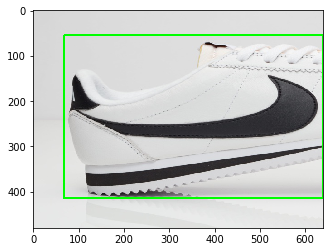

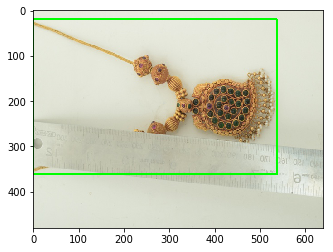

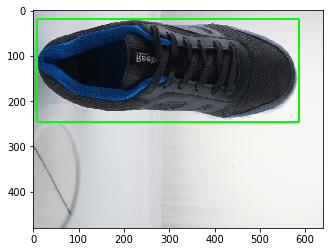

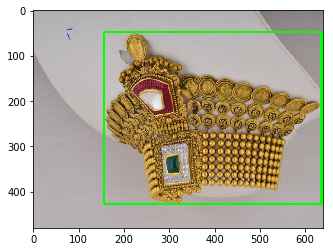

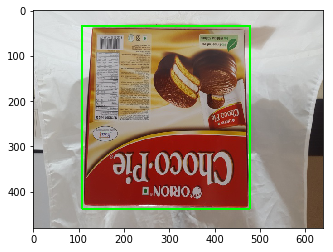

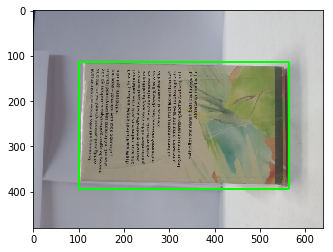

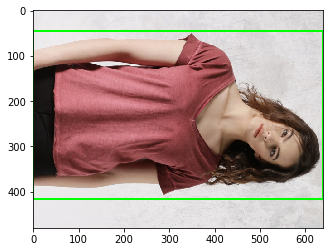

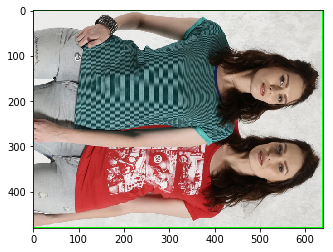

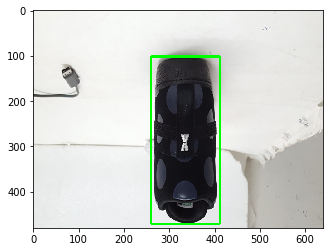

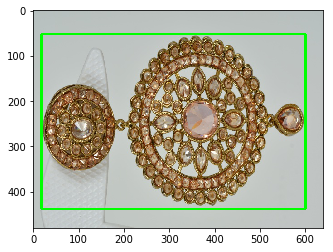

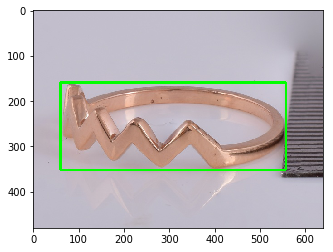

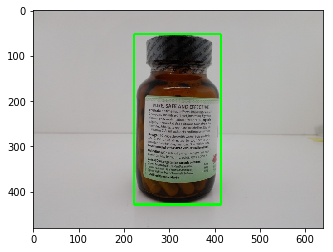

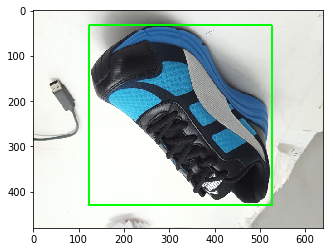

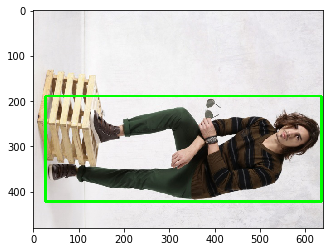

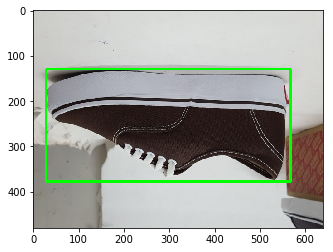

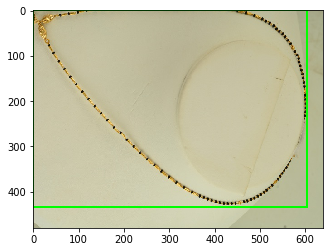

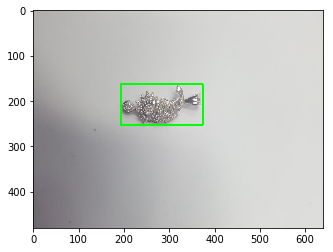

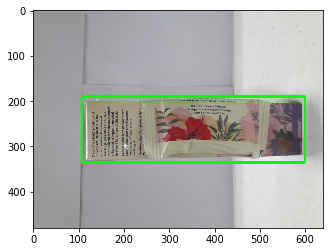

In [15]:

res_df = pd.read_csv(os.path.join(csv_dest_dir, 'train.csv'))
from tqdm import tqdm
idx = 0
for i, im in enumerate(tqdm(res_df.image_name)):
    if i % 5000 == 0:
        img = cv2.imread(os.path.join(dest_dir, im))
        plt.figure(idx)
        idx += 1
        lab = [res_df.at[i, 'x1'], res_df.at[i, 'x2'], res_df.at[i, 'y1'], res_df.at[i,  'y2']]
        show_img_with_rect(img, lab)
        print(im)